In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score

In [3]:
df=pd.read_csv(r"C:\Users\gnana\OneDrive\Desktop\Big Data project\PS_20174392719_1491204439457_log.csv")

In [52]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### EDA

In [5]:
df.shape

(1048575, 11)

In [6]:
df.drop(columns=["step","isFlaggedFraud"],inplace=True)

In [7]:
df.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

In [8]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values


figure = px.pie(df, 
             values=quantity,
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

### fraud analysis

In [10]:
fraud_df=df[df["isFraud"]==1]
fraud_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
1047888,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1


In [11]:
type = fraud_df["type"].value_counts()
transactions = type.index
quantity = type.values


figure = px.pie(fraud_df, 
             values=quantity,
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

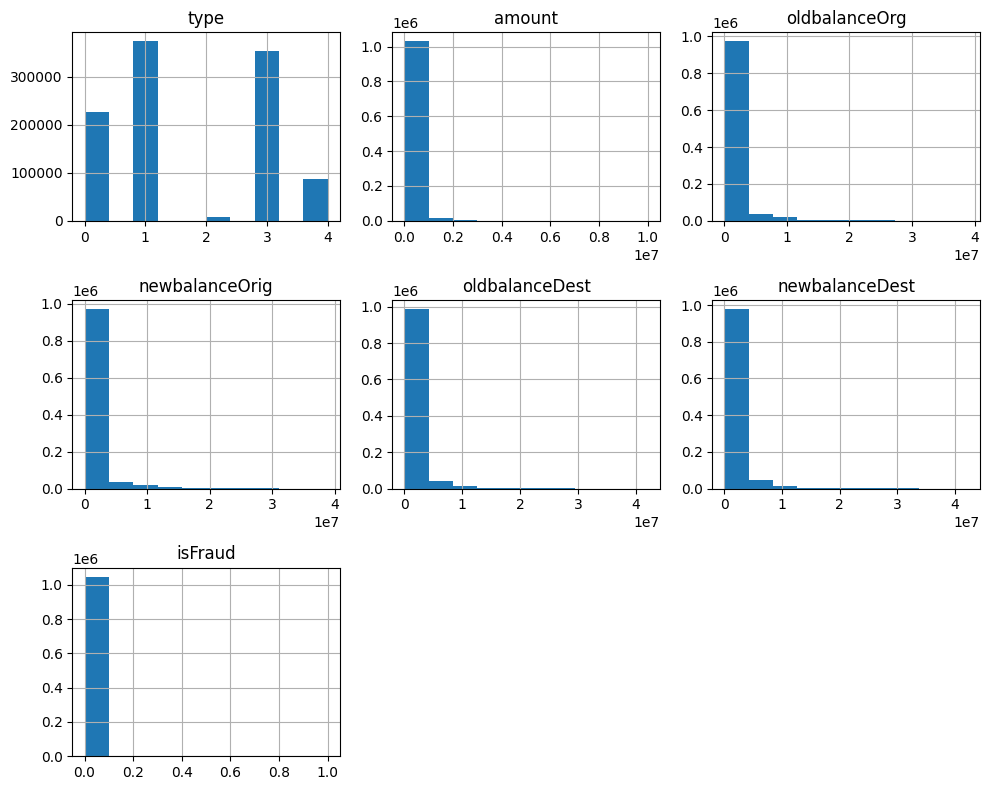

In [45]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Feature Selection

In [25]:
X = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]])
y = np.array(df[["isFraud"]])

In [46]:
X = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]]
y = df[["isFraud"]] 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734002, 6), (314573, 6), (734002, 1), (314573, 1))

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
set(corr_features) 

{'newbalanceOrig'}

### Correlation plot

<AxesSubplot:>

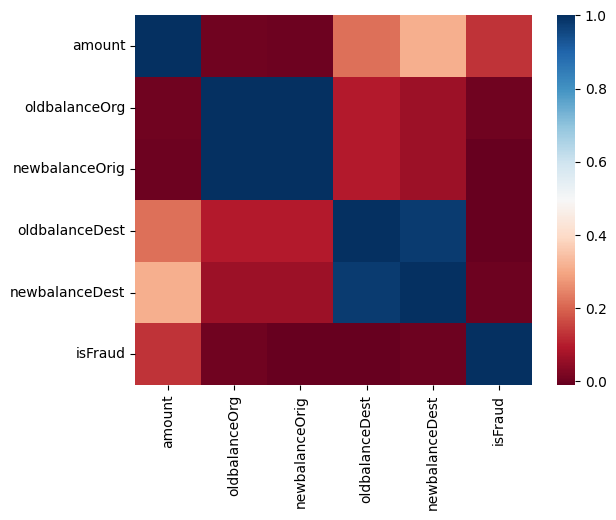

In [18]:
sns.heatmap(df.corr(),cmap='RdBu') 

### Covariance plot

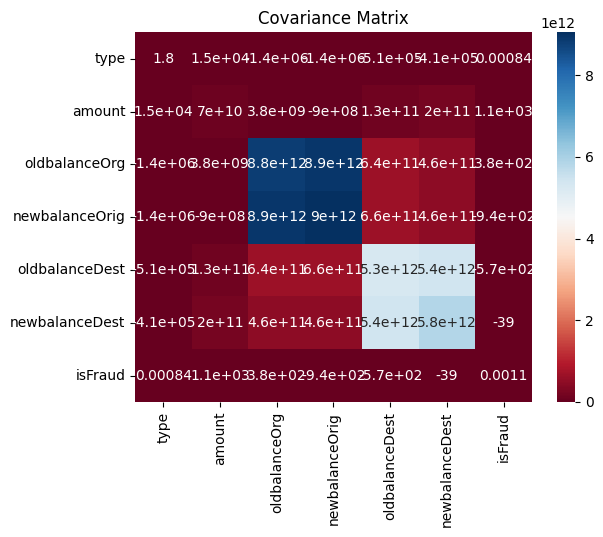

In [48]:
covariance_matrix = df.cov()
sns.heatmap(covariance_matrix, cmap='RdBu', annot=True)
plt.title('Covariance Matrix')
plt.show()


### Machine learning

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [50]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [29]:
models = [rf, knn, dt]

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(yt, yp):
    results = {}
    
    # Accuracy
    results['accuracy'] = accuracy_score(yt, yp)
    
    # Precision, recall, and F1-score
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='weighted')
    results['precision'] = precision
    results['recall'] = recall
    results['f1score'] = f_beta
    
    return results

In [51]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
results = evaluate_metrics(y_test, preds)
print(results)

c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'accuracy': 0.9993578597018816, 'precision': 0.9992893644870243, 'recall': 0.9993578597018816, 'f1score': 0.9992979225216808}


In [ ]:
for model in models:
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    results = evaluate_metrics(y_test, preds)
    print(results)

c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'accuracy': 0.9994818372841916, 'precision': 0.9994419808150367, 'recall': 0.9994818372841916, 'f1score': 0.9994481508571204}


c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'accuracy': 0.9993260705782123, 'precision': 0.9993145594164631, 'recall': 0.9993260705782123, 'f1score': 0.9993200776404855}
{'accuracy': 0.999424616861587, 'precision': 0.9994051495789877, 'recall': 0.999424616861587, 'f1score': 0.9994137473837592}


In [ ]:
model=rf
model.fit(X_train,y_train)
preds = model.predict(X_test)

NameError: name 'rf' is not defined

### confussion matrix

In [ ]:
cf = confusion_matrix(y_test, preds, normalize='true')

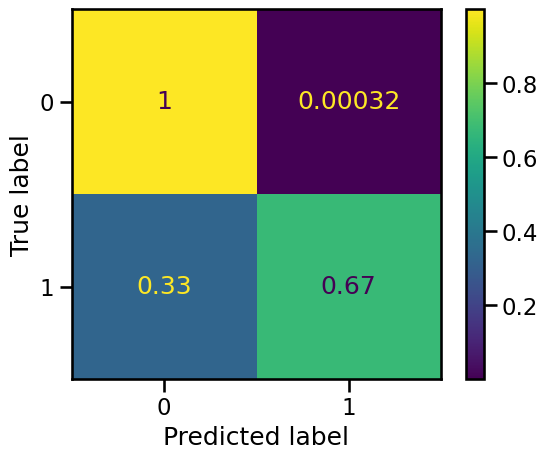

In [ ]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=model.classes_)
disp.plot()
plt.show()

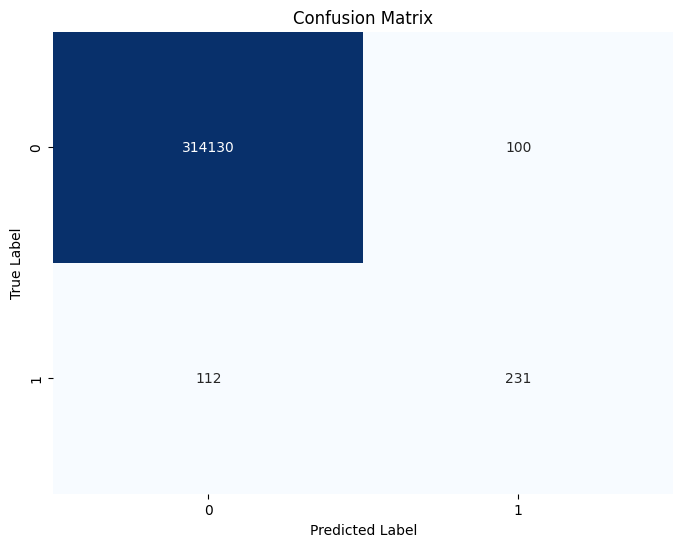

In [43]:
conf_matrix = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()